In [2]:
import numpy as np
from scipy import ndimage
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

In [2]:
# Q.1)  Study various edge detectors and see the effect of applying edge detectors on various images and compare your results.
# Ans.) Basically there are 3 types of edge detectors :- Roberts, sobel, Prewitt, canny.

# Roberts :- The Roberts Cross operator performs a simple, quick to compute, 2-D spatial gradient measurement on an image.
#            It thus highlights regions of high spatial frequency which often correspond to edges. In its most common
#             usage, the input to the operator is a grayscale image, as is the output.

# Sobel :-  It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction
#           of the largest increase from light to dark and the rate of change in that direction.The result shows how
#           abruptly or smoothly the image changes at eachpixel, and therefore how likely it is that that pixel represents edge.

# Prewitt :- Prewitt operator is used for edge detection in an image. It detects two types of edges 
#            1.) Horizontal edges 2.) Vertical Edges
#            Edges are calculated by using difference between corresponding pixel intensities of an image. All the masks that
#            are used for edge detection are also known as derivative masks.Because as we have stated many times before in this 
#           series of tutorials that image is also a signal so changes in a signal can only be calculated using differentiation.

In [3]:
# Implementing Different operators on different images

In [4]:
# Roberts Method :- 

In [5]:
img = cv2.imread("D:/coastline.jpg",0).astype('float64')

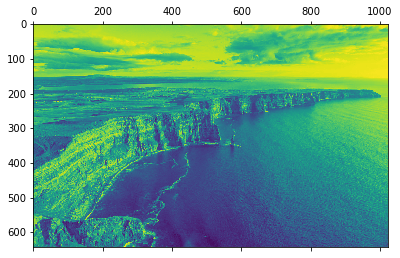

In [16]:
plt.matshow(img)

In [6]:
window_name = 'img'

In [7]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

In [8]:
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

In [9]:
img = img/255

In [10]:
vertical = ndimage.convolve( img, roberts_cross_v )

In [11]:
horizontal = ndimage.convolve( img, roberts_cross_h )

In [12]:
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

In [13]:
edged_img*=255

In [14]:
cv2.imwrite("coastline_output.jpg",edged_img)

True

In [79]:
edged_img = cv2.cvtColor(edged_img.astype(np.uint8), cv2.COLOR_GRAY2RGB)

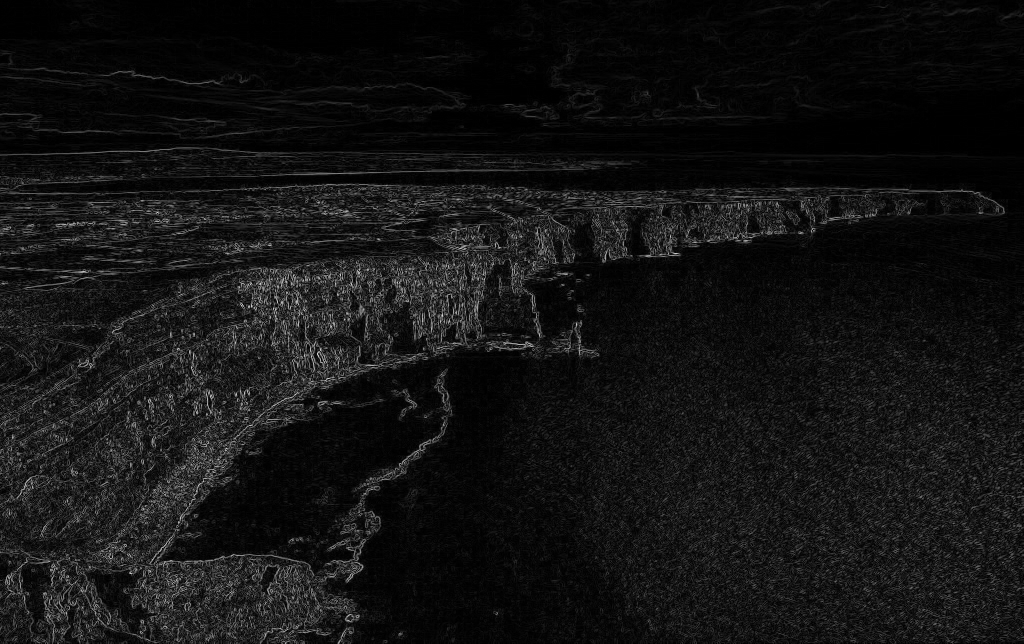

In [80]:
display(Image.fromarray(edged_img))

In [17]:
# Sobels Method

In [18]:
img_1 = cv2.imread("D:/Monkey.jpg",0).astype('float64')

In [81]:
image_sobel_perfect = cv2.Sobel(img_1,cv2.CV_64F,1,0,ksize = 3) # kernel size = 3

In [82]:
image_sobel_perfect = cv2.cvtColor(image_sobel_perfect.astype(np.uint8), cv2.COLOR_GRAY2RGB)

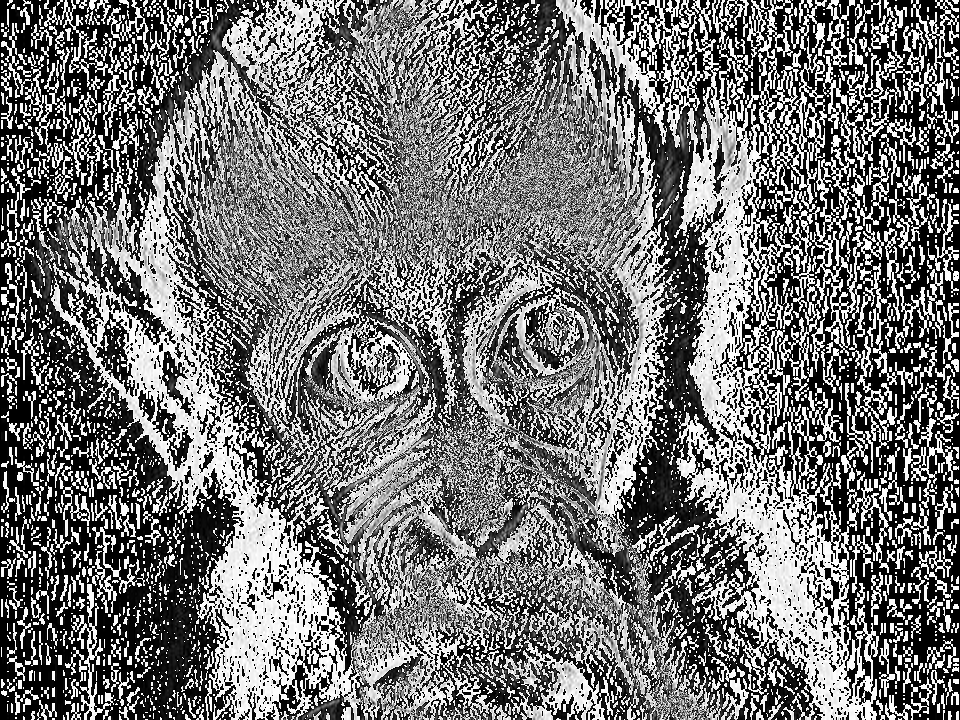

In [83]:
display(Image.fromarray(image_sobel_perfect))

In [84]:
# Prewitt edge Detector 

In [98]:
img_virat = cv2.imread("D:/Images/virat.webp",0).astype('float64')

In [99]:
Prewitt_x =  np.array( [[1,1,1 ],[0,0,0],[-1,-1,-1]] )
Prewitt_y =  np.array( [[-1,0,1 ],[-1,0,1],[-1,0,1]] )
prewitt_imagex = cv2.filter2D(img_virat,-1,Prewitt_x)
prewitt_imagey = cv2.filter2D(img_virat,-1,Prewitt_y)

In [100]:
pre_img = np.sqrt( np.square(prewitt_imagex) + np.square(prewitt_imagey))

In [101]:
pre_img = pre_img*255

In [102]:
pre_img = cv2.cvtColor(pre_img.astype(np.uint8), cv2.COLOR_GRAY2RGB)

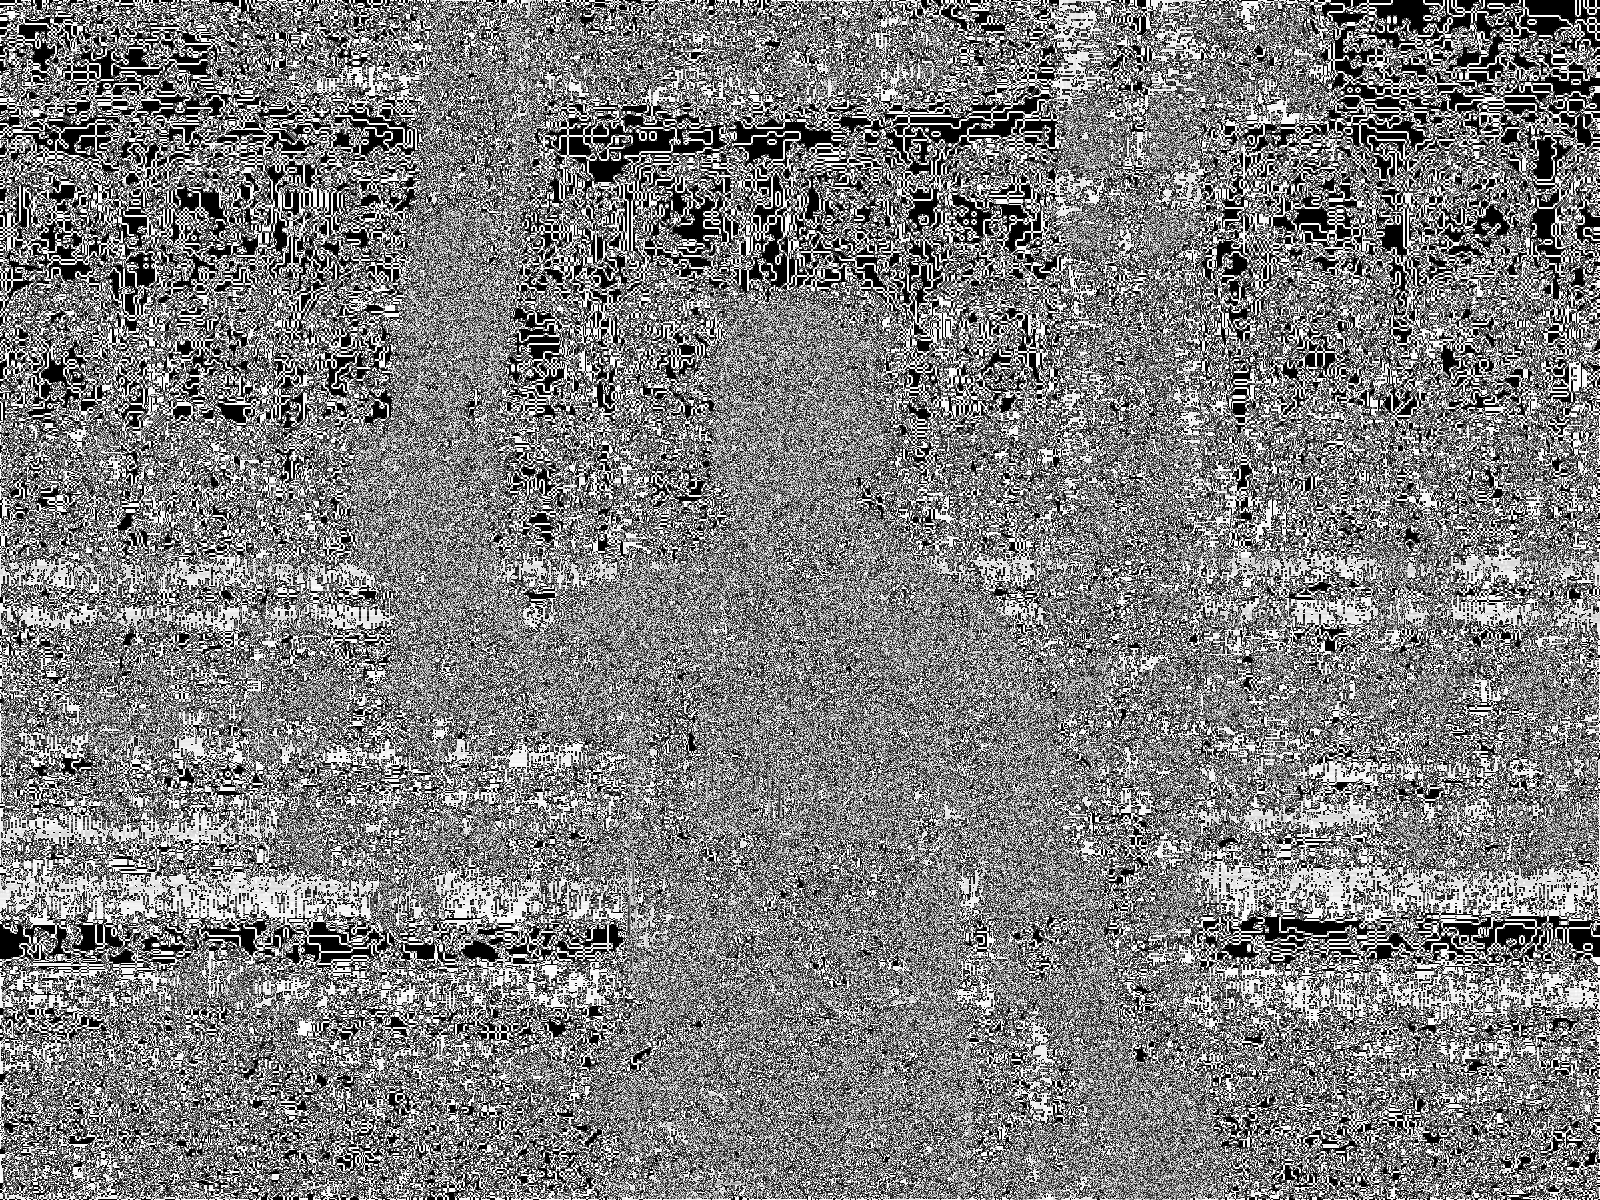

In [103]:
display(Image.fromarray(pre_img))

In [ ]:
# Canny Edge Detector

In [104]:
img_virat = img_virat*255
img_virat_canny = cv2.Canny(img_virat.astype(np.uint8),50,100)

In [105]:
 img_virat_canny = cv2.cvtColor(img_virat_canny.astype(np.uint8), cv2.COLOR_GRAY2RGB)

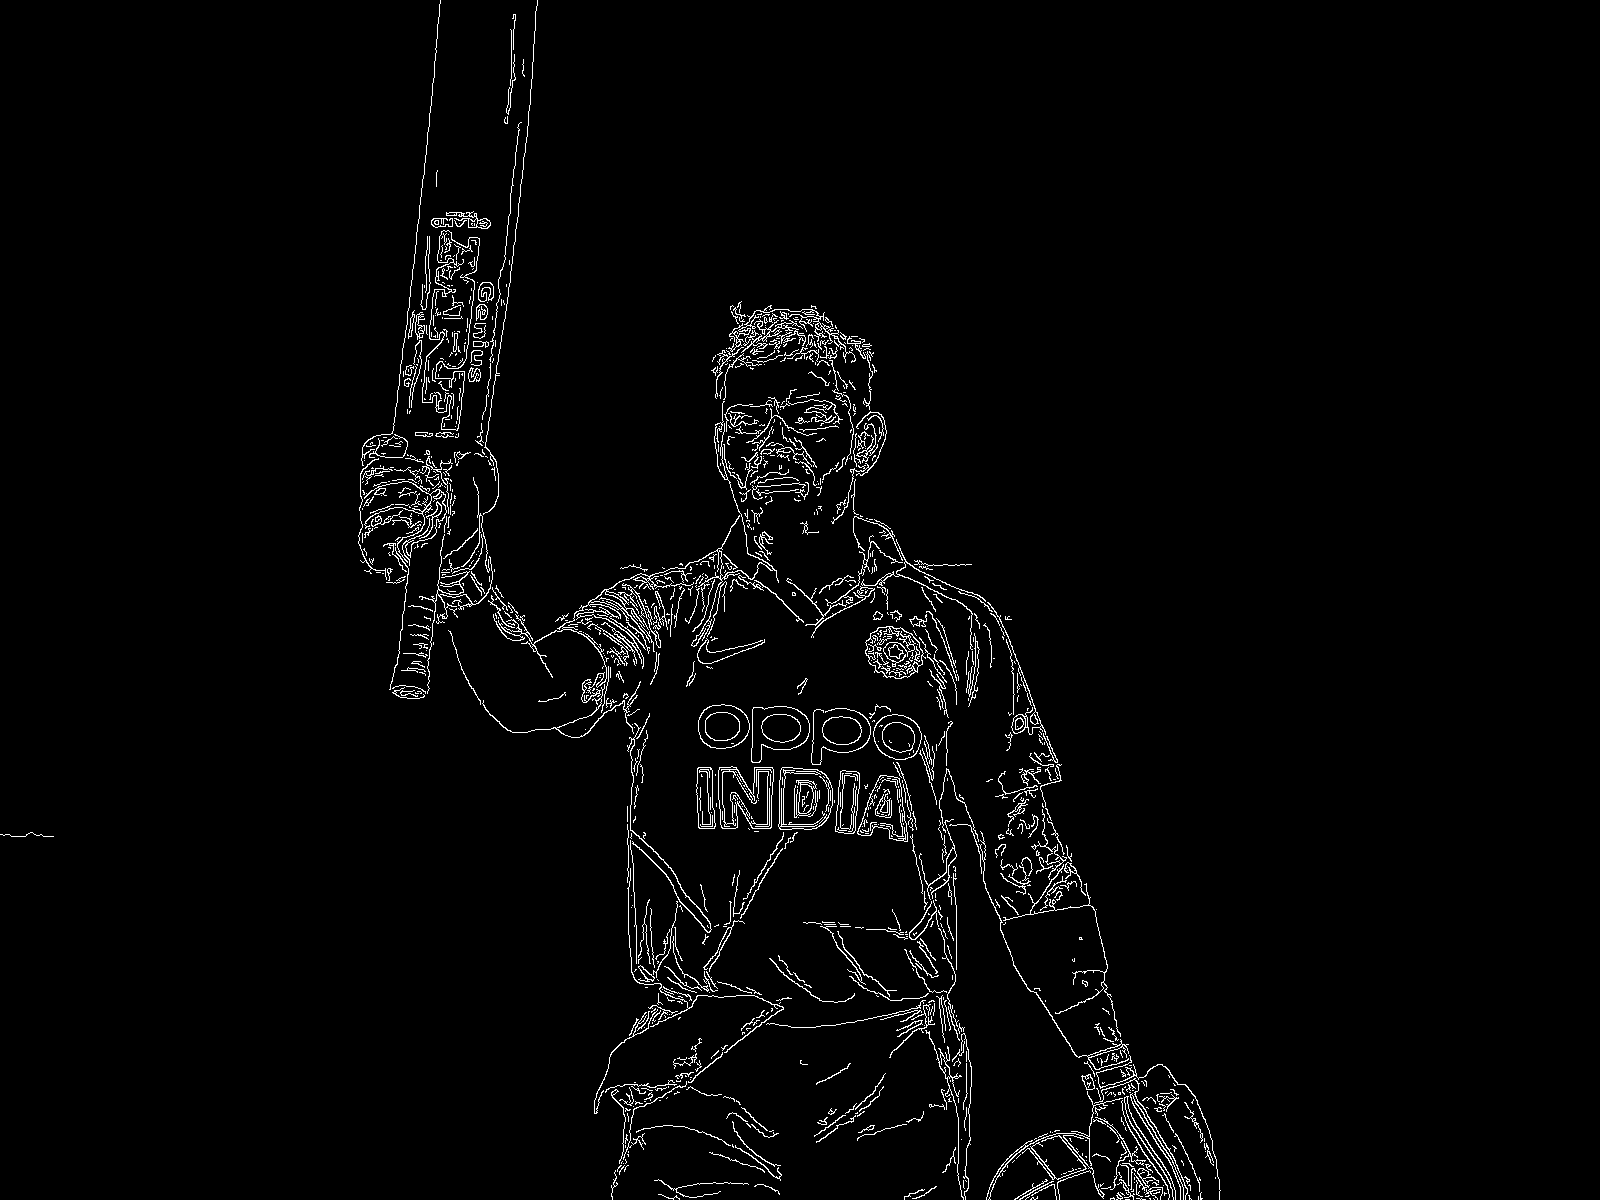

In [106]:
display(Image.fromarray(img_virat_canny))

In [142]:
# Conclusion :- So as you can see after applying and comparing various edge detectors I can say that canny edge detector was 
# the one which was giving the prominent results. This maybe due to change of an image but the edges were sharply visible in 
# Canny Edge Detector.Prewitt was the one who didnt give me very good results as lot of noise was innovlved in it.

In [49]:
# Q.2) Write a program to add/subtract two images of your two digit roll number.

In [108]:
zero = cv2.imread('D:/Images/first_image.jpg',0).astype(np.uint8)

In [110]:
six = cv2.imread('D:/Images/second_image.jpg',0).astype(np.uint8)

In [137]:
zero = cv2.resize(zero, (six.shape[1], six.shape[0]))

In [138]:
im_h = np.concatenate((zero,six),axis=1)

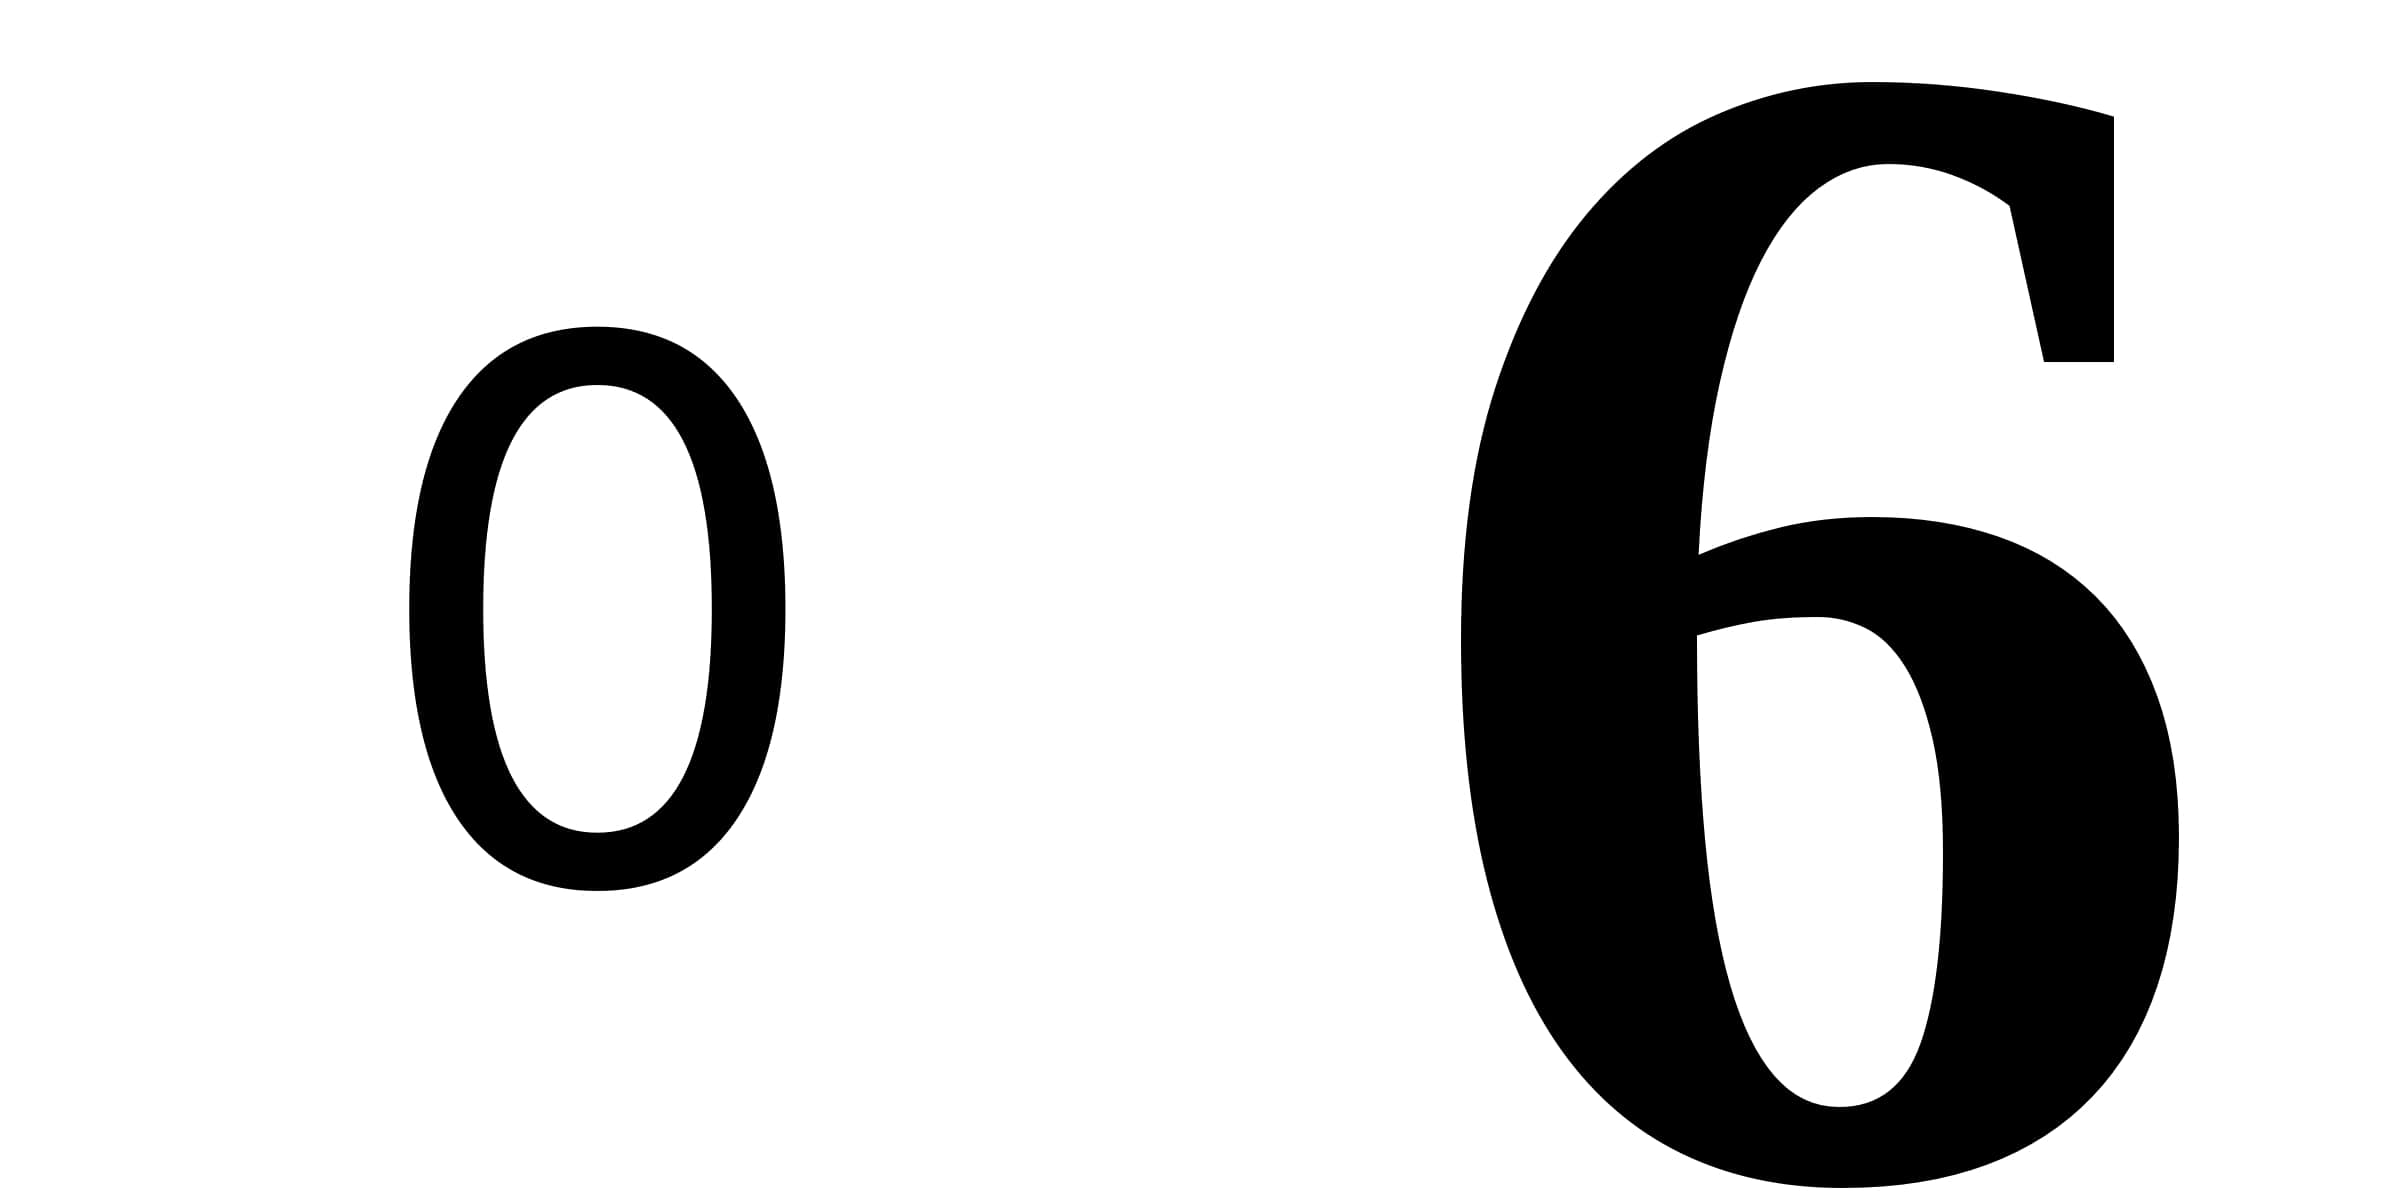

In [139]:
im_h = cv2.cvtColor(im_h.astype(np.uint8), cv2.COLOR_GRAY2RGB)
display(Image.fromarray(im_h))

In [132]:
im_h = cv2.cvtColor(im_h.astype(np.uint8), cv2.COLOR_BGR2GRAY)

In [133]:
# Q.3) Write a program to rotate/translate/shear/scale an image of your roll number.

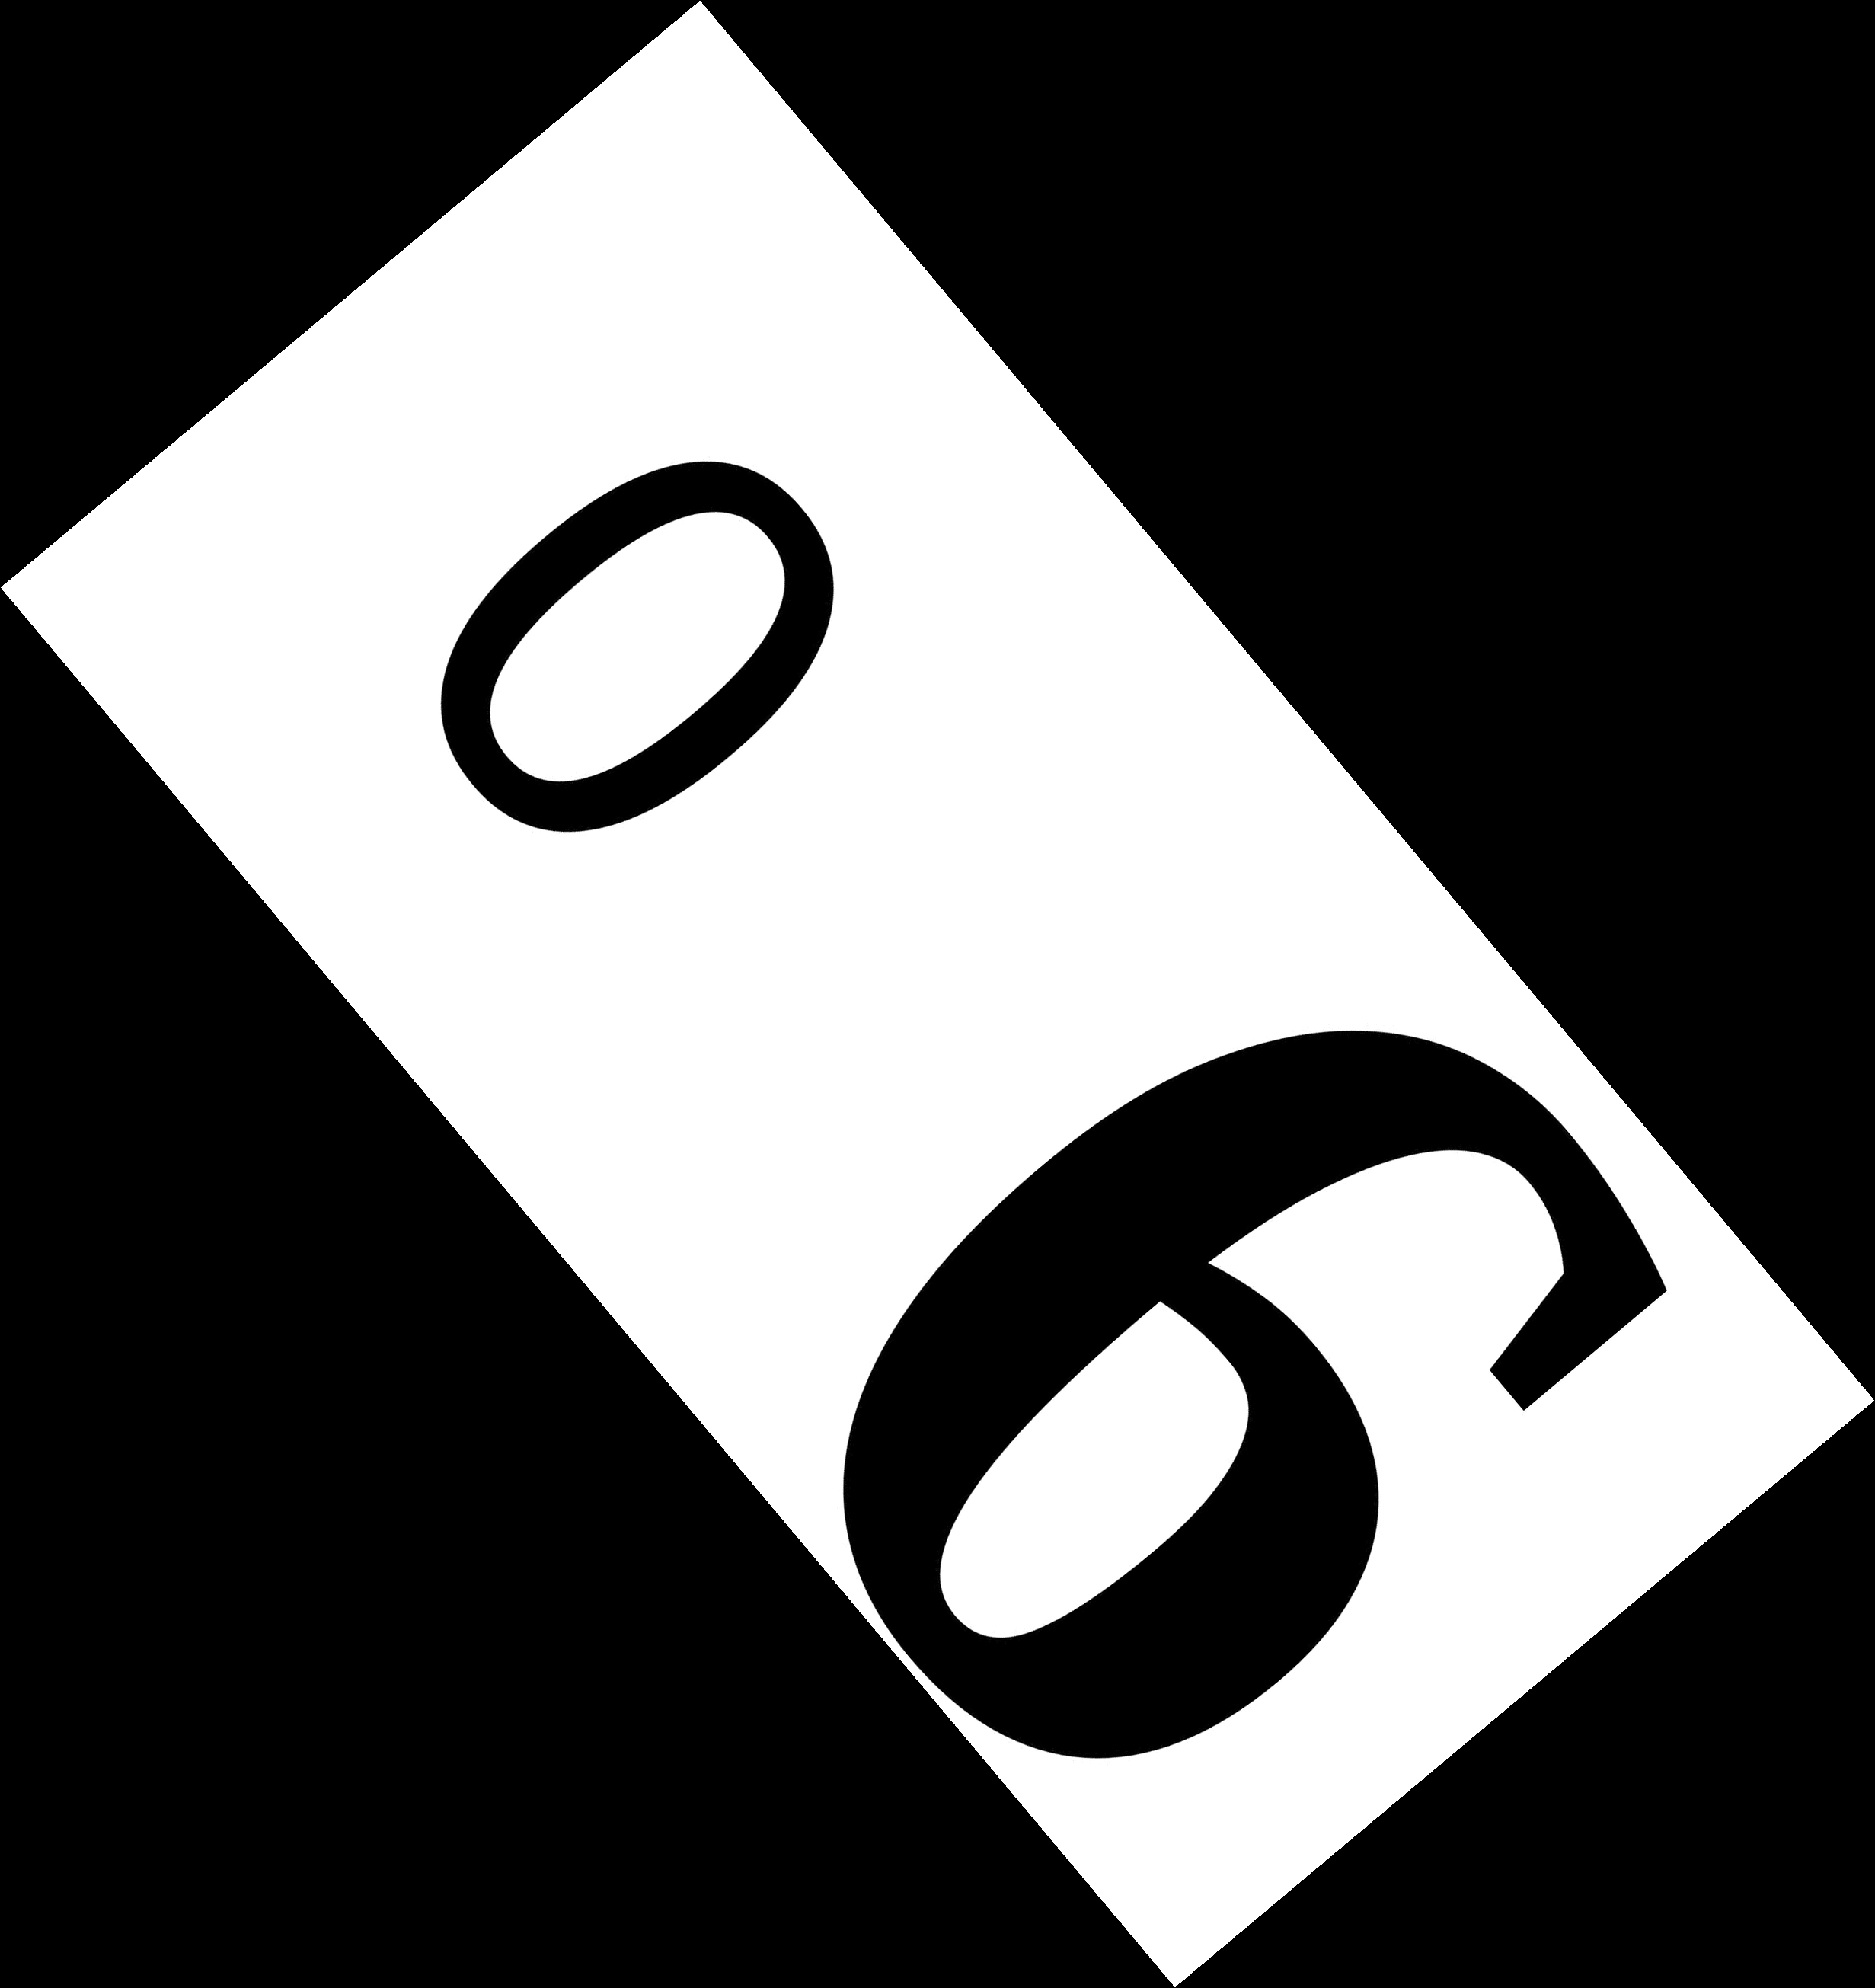

In [140]:
rotate_img = ndimage.rotate(im_h, -50)
display(Image.fromarray(rotate_img))

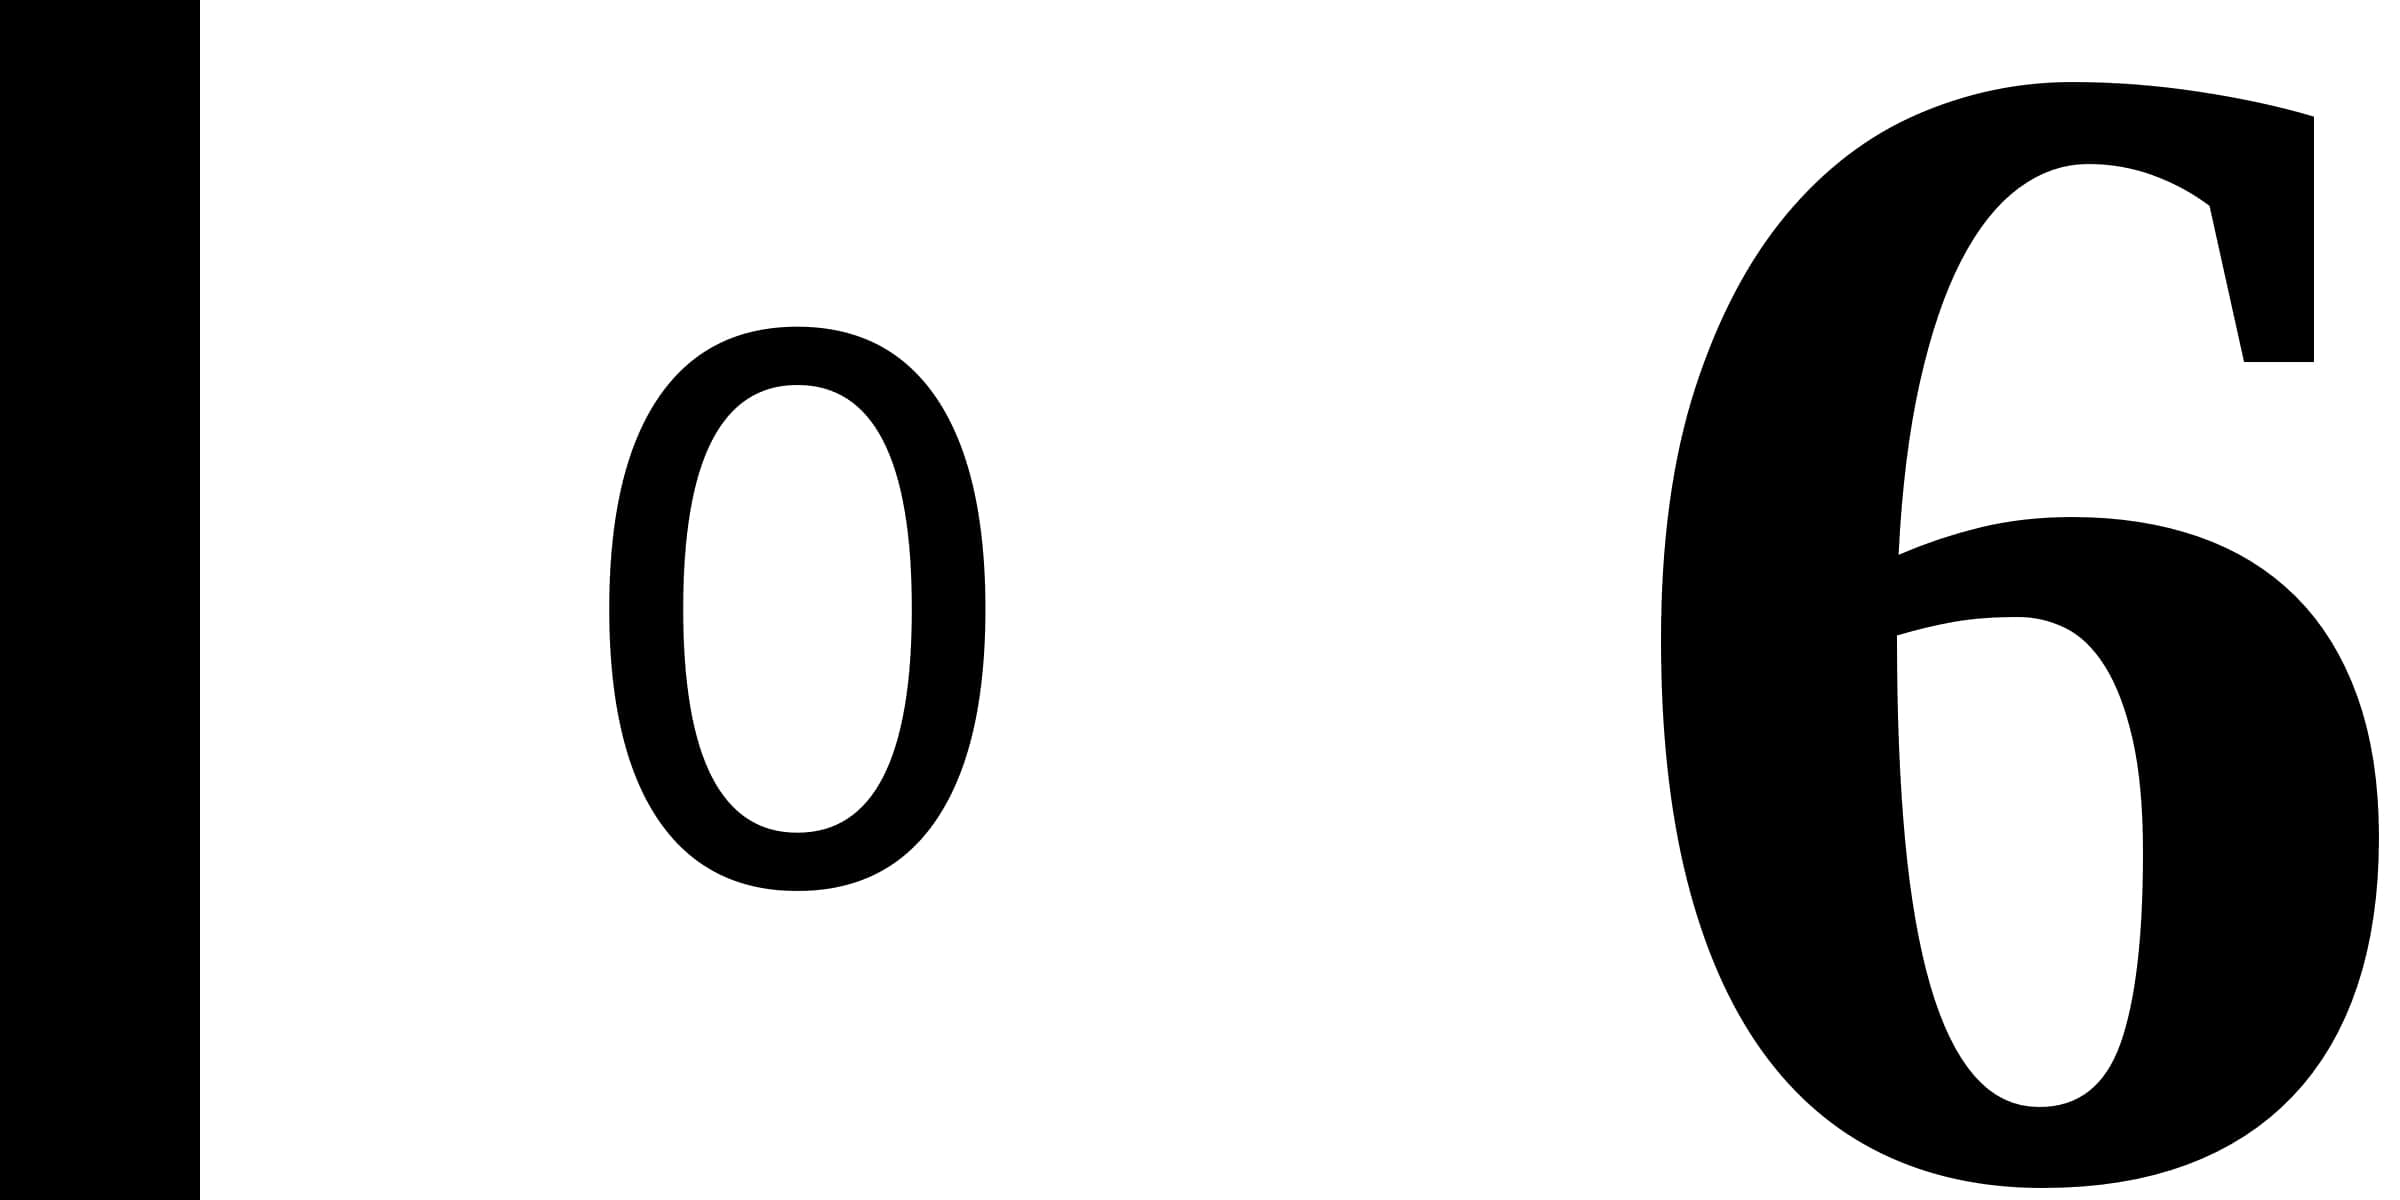

In [136]:
translate = ndimage.shift(im_h,(0,200))
display(Image.fromarray(translate))

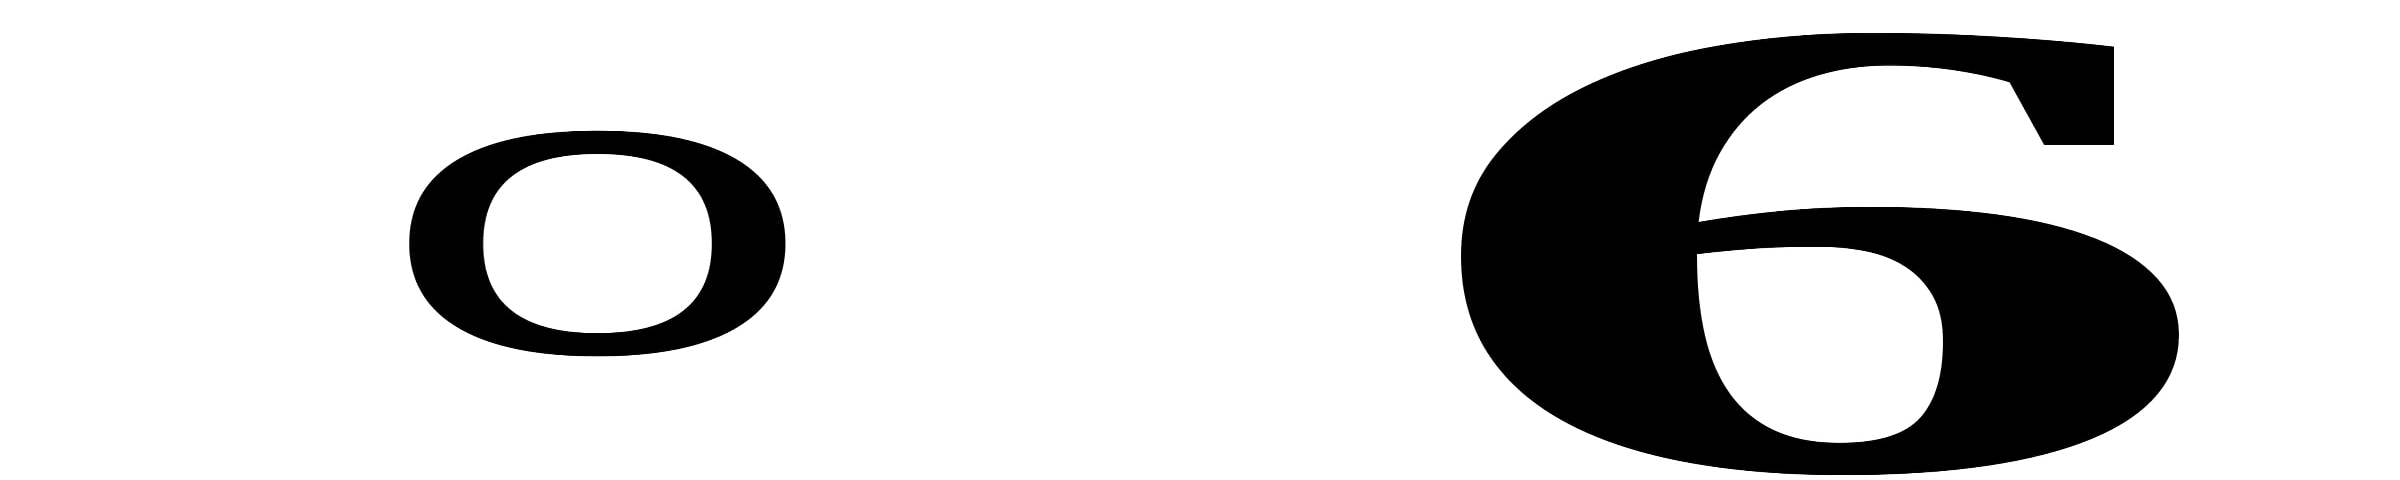

In [141]:
Scale = cv2.resize(im_h, None, fx=1, fy=0.4)
display(Image.fromarray(Scale))

In [152]:
im_h.shape # 3 arguments rows, columns, dimension

(1200, 2400, 3)

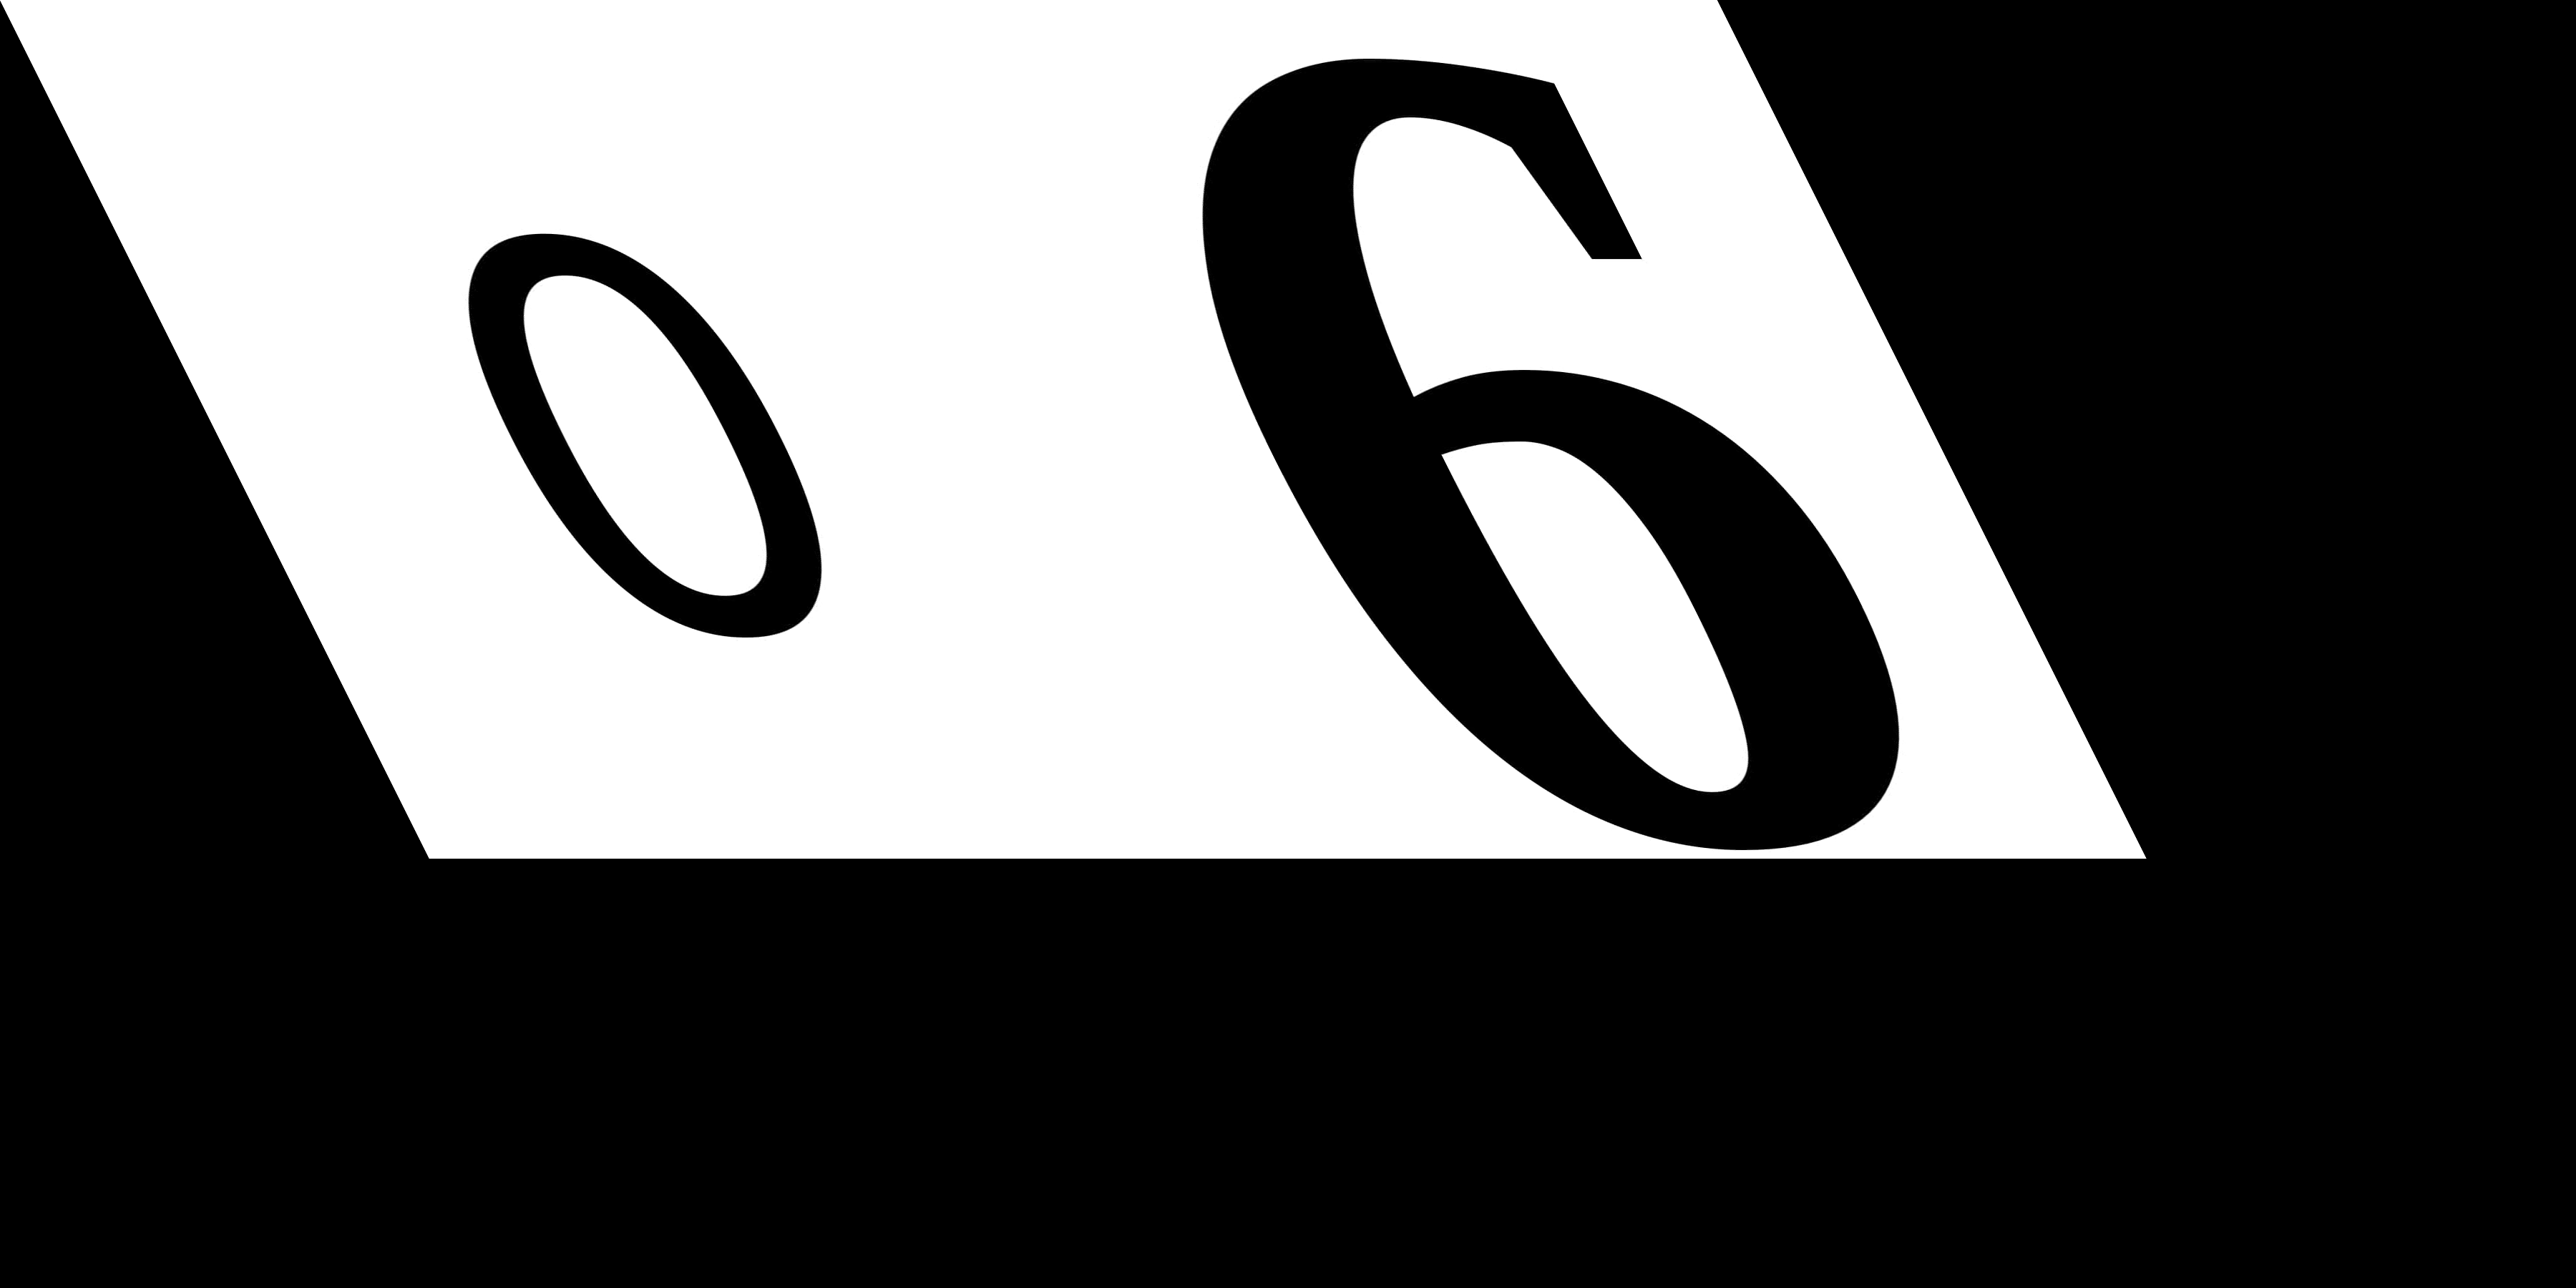

In [151]:
rows,cols,dim = im_h.shape
kernal = np.float32([[1, 0.5, 0],
             	[0, 1  , 0],
            	[0, 0  , 1]])
image_shear = cv2.warpPerspective(im_h,kernal,(int(cols*1.5),int(rows*1.5)))
display (Image.fromarray(image_shear))

In [153]:
# Q.4) Erode and Dilate the following image and try to count total number of circles in it.

In [3]:
gems_img = cv2.imread('D:/Images/gems.png',0).astype(np.uint8)

In [4]:
kernel = np.ones((5,5), np.uint8)

In [5]:
img_erosion = cv2.erode(gems_img, kernel, iterations=1)

In [7]:
img_dilation = cv2.dilate(gems_img, kernel, iterations=1)

In [9]:
img_erosion = cv2.cvtColor(img_erosion.astype(np.uint8), cv2.COLOR_GRAY2RGB)

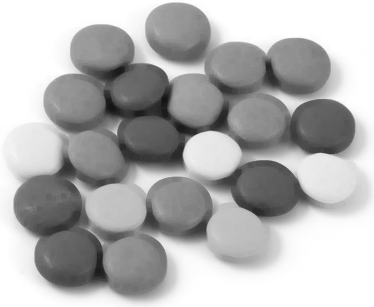

In [10]:
display(Image.fromarray(img_erosion)) # have used the direct erosion function available in CV.

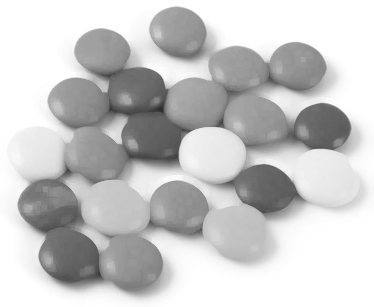

In [11]:
img_dilation = cv2.cvtColor(img_dilation.astype(np.uint8), cv2.COLOR_GRAY2RGB)
display(Image.fromarray(img_dilation)) # have used the direct dilution function available in CV.

In [12]:
# We can calculate the number of circles in a given image by:-

In [14]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100

In [15]:
params.filterByCircularity = True
params.minCircularity = 0.9

In [16]:
params.filterByConvexity = True
params.minConvexity = 0.2

In [17]:
params.filterByInertia = True
params.minInertiaRatio = 0.01

In [18]:
detector = cv2.SimpleBlobDetector_create(params)

In [20]:
keypoints = detector.detect(gems_img)

In [21]:
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(gems_img, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [26]:
number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

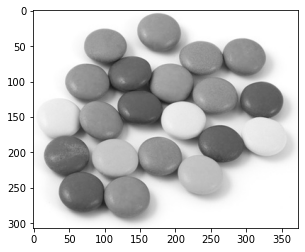

In [27]:
plt.imshow(blobs)